In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [358]:
data_1 = pd.read_csv('tmdb_genres.csv')

In [359]:
data_1.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [360]:
data_2 = pd.read_csv('tmdb_movies.csv')

In [361]:
data_2.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


### Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [362]:
most = data_2[['original_title', 'vote_average', 'vote_count']]

In [363]:
most.head()

,original_title,vote_average,vote_count
0,Avatar,7.2,11800
1,Pirates of the Caribbean: At World's End,6.9,4500
2,Spectre,6.3,4466
3,The Dark Knight Rises,7.6,9106
4,John Carter,6.1,2124


In [364]:
most = most[most['vote_count'] > most['vote_count'].quantile(q=0.75)]
most.sort_values('vote_average', ascending=False).head(10)

,original_title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
2294,千と千尋の神隠し,8.3,3840
3865,Whiplash,8.3,4254
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
662,Fight Club,8.3,9413
2170,Psycho,8.2,2320
1847,GoodFellas,8.2,3128


### Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [365]:
def date_to_year(row):
    x = pd.to_datetime(row['release_date']).year
    return x

In [366]:
avg = data_2  
avg['release_date'] = avg.apply(lambda row: date_to_year(row), axis=1)

years = []
for n in range(2010,2017):
    years.append(n)

In [367]:
avg = avg[(avg['release_date'] >= 2010) & (avg['release_date'] <= 2016)]

In [368]:
avg.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015.0,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012.0,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012.0,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010.0,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0
7,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015.0,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0


In [369]:
avg = avg.pivot_table(values=('revenue','budget'), index='release_date', aggfunc='mean')
avg.sort_index()

,budget,revenue
release_date,,
2010.0,3.449541e+07,9.043811e+07
2011.0,3.477232e+07,9.200413e+07
2012.0,3.492203e+07,1.160659e+08
2013.0,3.552329e+07,1.013485e+08
2014.0,3.095989e+07,1.013466e+08
2015.0,3.113216e+07,1.054399e+08
2016.0,4.570327e+07,1.390496e+08


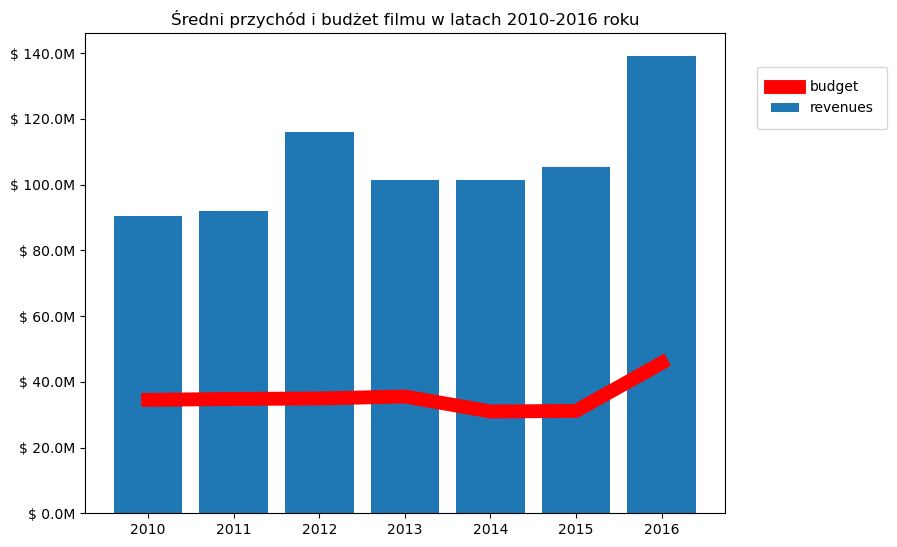

In [370]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
revenue = avg['revenue']
budget = avg['budget']

def million(x, pos):
    return '$ {:2.1f}M'.format(x*1e-6)
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.bar(years, revenue, label='revenues')
axes.plot(years, budget, color='red', linewidth=10, label='budget')
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016 roku')
axes.legend(loc=(1.05,0.8), markerscale=0.1, borderpad=1)

### Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [371]:
data_1.rename(columns={'Unnamed: 0': 'no'}, inplace=True)
data_joined = data_2.join(data_1.set_index('no'), on='genre_id')

In [372]:
data_joined.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009.0,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007.0,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015.0,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012.0,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012.0,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action


### Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [373]:
most_genres = data_joined['genres'].value_counts()
most_genres

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [374]:
most_genres[most_genres == most_genres.max()].index

Index(['Drama'], dtype='object')

### Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [375]:
avg_runtime = data_joined[['genres', 'runtime']].groupby(by='genres', as_index=False).mean()

In [376]:
avg_runtime[avg_runtime['runtime'] == avg_runtime['runtime'].max()]

,genres,runtime
10,History,133.96


### Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [377]:
x = data_joined[data_joined['genres'] == 'History']
x.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
110,110,140000000,NaN,676,en,Pearl Harbor,The lifelong friendship between Rafe McCawley ...,34.206690,2001.0,449220945,183.0,Released,It takes a moment to change history. It takes ...,Pearl Harbor,6.6,1791,36.0,History
280,280,80000000,http://www.publicenemies.net/,11322,en,Public Enemies,Depression-era bank robber John Dillinger's ch...,33.691694,2009.0,214104620,140.0,Released,America's Most Wanted.,Public Enemies,6.5,1344,36.0,History
633,633,65000000,NaN,72976,en,Lincoln,A revealing drama that focuses on the 16th Pre...,36.307296,2012.0,275293450,149.0,Released,With the moral courage and fierce determinatio...,Lincoln,6.7,1429,36.0,History
839,839,55000000,http://en.wikipedia.org/wiki/Evita_(film),8818,en,Evita,The hit musical based on the life of Evita Dua...,7.027139,1996.0,141047179,134.0,Released,The Most Anticipated Motion Picture Event of T...,Evita,5.9,120,36.0,History
1091,1091,44000000,NaN,10858,en,Nixon,An all-star cast powers this epic look at Amer...,3.770161,1995.0,13681765,192.0,Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7.1,71,36.0,History


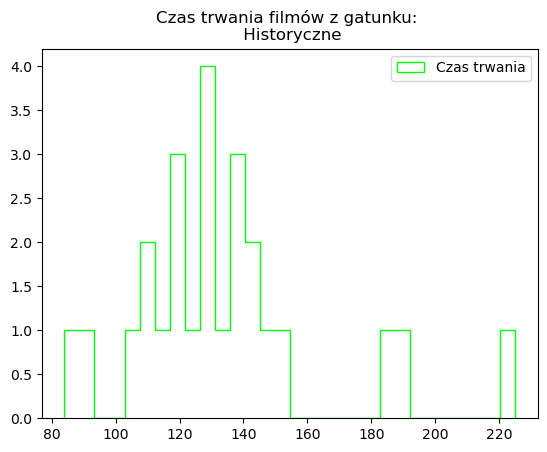

In [378]:
e = x['runtime']

n_bins = 30
plt.close('all')
fig = plt.figure()
ax2 = plt
ax2.hist(e, n_bins, histtype='step', stacked=True, fill=False, color='lime', label='Czas trwania')
ax2.legend(prop={'size': 10})
ax2.title('Czas trwania filmów z gatunku: \n Historyczne')

plt.show()